
### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("f:/Britich Airline/Predicting customer buying behaviour/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.describe(include='object')

,sales_channel,trip_type,route,booking_origin
count,50000,50000,50000,50000
unique,2,3,799,104
top,Internet,RoundTrip,AKLKUL,Australia
freq,44382,49497,2680,17872


In [9]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
num_data = df.select_dtypes(include = 'number')
cat_data = df.select_dtypes(include = 'object')

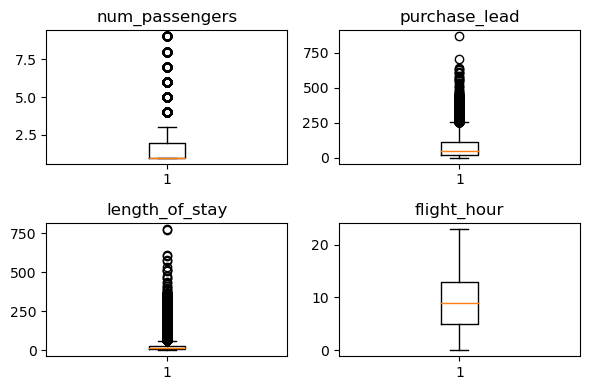

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(6, 4))


axs[0, 0].boxplot(df['num_passengers'])
axs[0, 0].set_title('num_passengers')

axs[0, 1].boxplot(df['purchase_lead'])
axs[0, 1].set_title('purchase_lead')

axs[1, 0].boxplot(df['length_of_stay'])
axs[1, 0].set_title('length_of_stay')

axs[1, 1].boxplot(df['flight_hour'])
axs[1, 1].set_title('flight_hour')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

num_passengers,purchase_lead,length_of_stay have some outliers 

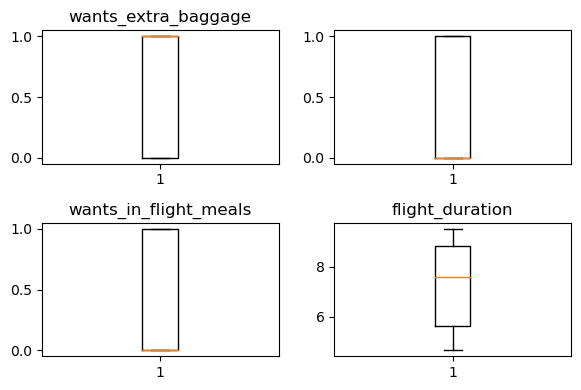

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(6, 4))

# Plot box plots
axs[0, 0].boxplot(df['wants_extra_baggage'])
axs[0, 0].set_title('wants_extra_baggage')

axs[0, 1].boxplot(df['wants_preferred_seat'])
axs[1, 1].set_title('wants_preferred_seat')

axs[1, 0].boxplot(df['wants_in_flight_meals'])
axs[1, 0].set_title('wants_in_flight_meals')

axs[1, 1].boxplot(df['flight_duration'])
axs[1, 1].set_title('flight_duration')

plt.tight_layout()

plt.show()

These 4 features are normally distributed and have no outliers 

In [13]:
df['num_passengers'].mode()

0    1
Name: num_passengers, dtype: int64

In [14]:
Q1 = df['num_passengers'].quantile(0.25)
Q3 = df['num_passengers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['num_passengers'] < lower_bound) | (df['num_passengers'] > upper_bound)]
outliers['num_passengers'].sum()
#df.loc[(df['num_passengers'] < lower_bound) | (df['num_passengers'] > upper_bound), 'num_passengers'] = np.nan


13779

the outliers in these features is crutual for the model so we can't drop or cap it so we'll standarize in model section

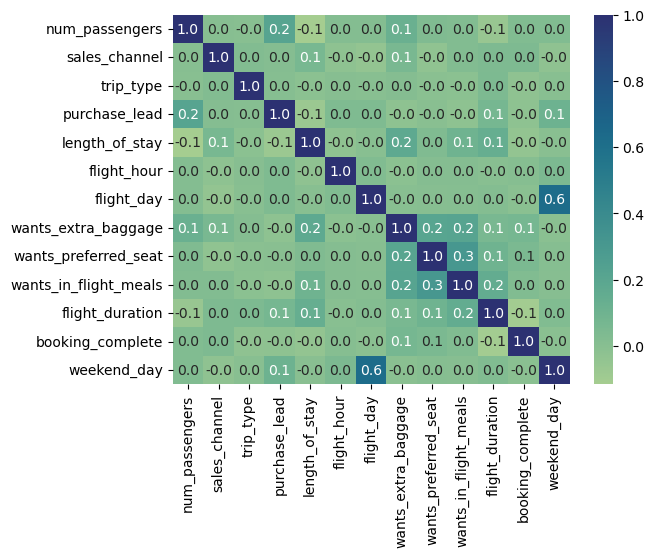

In [214]:
sns.heatmap(df.corr(), cmap="crest",annot=True, fmt=".1f");

In [15]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sales_channel   50000 non-null  object
 1   trip_type       50000 non-null  object
 2   route           50000 non-null  object
 3   booking_origin  50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


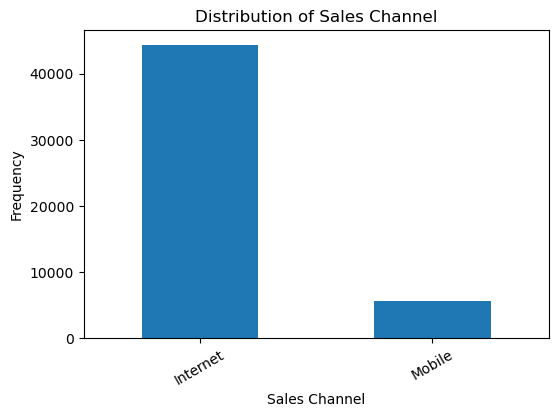

In [16]:
cat_data['sales_channel'].value_counts().plot(kind='bar',figsize=(6,4))
plt.xlabel('Sales Channel')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Channel')
plt.xticks(rotation=30)  

plt.show();

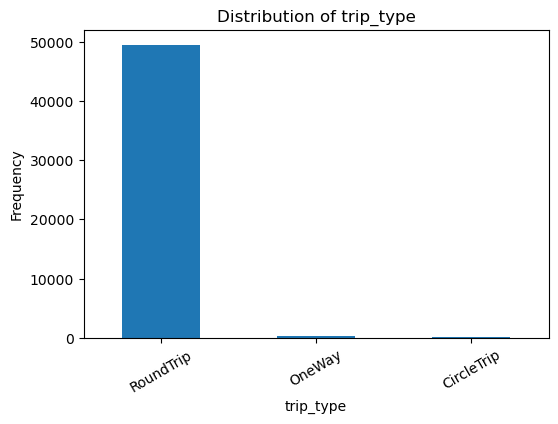

In [17]:
cat_data['trip_type'].value_counts().plot(kind='bar',figsize=(6,4))
plt.xlabel('trip_type')
plt.ylabel('Frequency')
plt.title('Distribution of trip_type')
plt.xticks(rotation=30)  

plt.show();

In [18]:
cat_data['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

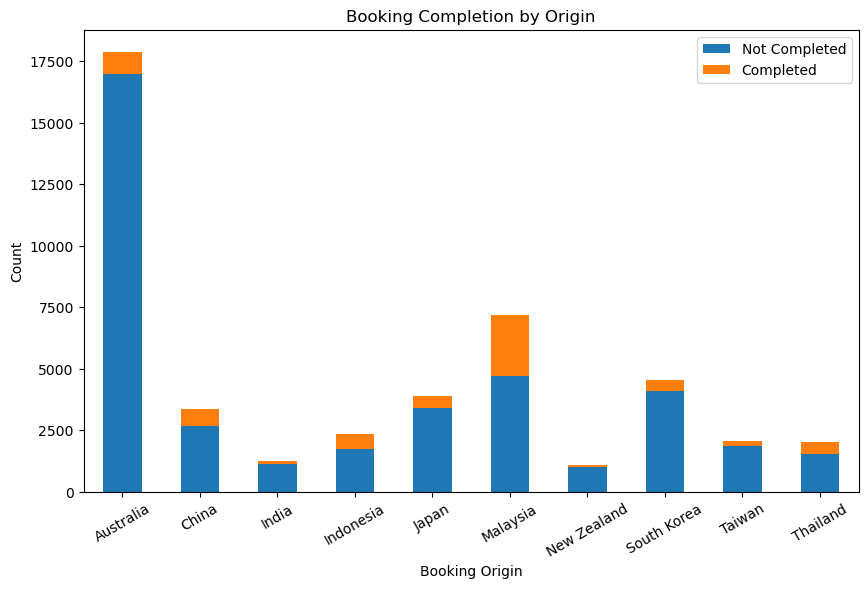

In [19]:
top_countries = df['booking_origin'].value_counts().nlargest(10).index

filtered_data = df[cat_data['booking_origin'].isin(top_countries)]

grouped_data = filtered_data.groupby(['booking_origin', 'booking_complete']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Booking Origin')
plt.ylabel('Count')
plt.title('Booking Completion by Origin')
plt.xticks(rotation=30)  

plt.legend(['Not Completed', 'Completed'], loc='upper right') 

plt.show()

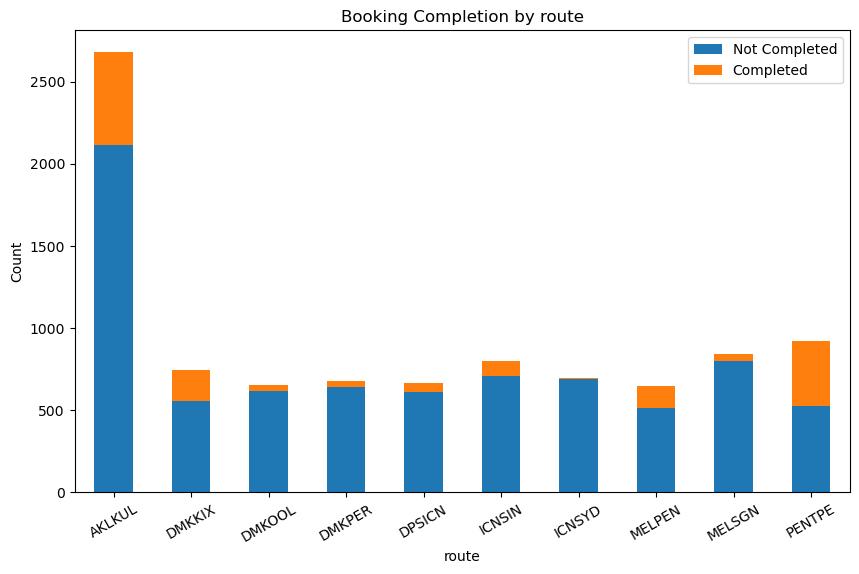

In [20]:
top_countries = df['route'].value_counts().nlargest(10).index

filtered_data = df[cat_data['route'].isin(top_countries)]

grouped_data = filtered_data.groupby(['route', 'booking_complete']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('route')
plt.ylabel('Count')
plt.title('Booking Completion by route')
plt.xticks(rotation=30)  

plt.legend(['Not Completed', 'Completed'], loc='upper right') 

plt.show()

There is no remarkable relation between both so it won't affect our model if we drop it 

<AxesSubplot:>

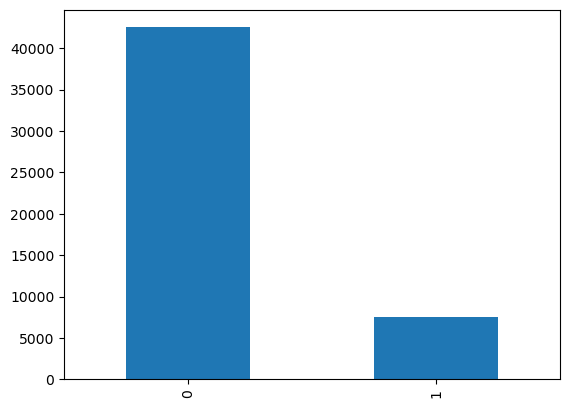

In [150]:
df['booking_complete'].value_counts().plot(kind='bar')

## data preperation

In [21]:
df.drop(['route','booking_origin'],axis=1,inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,1,0,1,5.52,0


In [22]:
mapping = {
    "Internet": 1,
    "Mobile": 0,
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [23]:
mapping = {
    "RoundTrip": 0,
    "CircleTrip": 1,
    "OneWay": 2
}

df["trip_type"] = df["trip_type"].map(mapping)

In [58]:
df['weekend_day'] = df['flight_day'] == 6 | 7
df['weekend_day'].value_counts()

False    43446
True      6554
Name: weekend_day, dtype: int64

In [59]:
mapping = {
    True: 1,
    False: 0,
}

df["weekend_day"] = df["weekend_day"].map(mapping)

In [61]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,weekend_day
0,2,1,0,262,19,7,6,1,0,0,5.52,0,0
1,1,1,0,112,20,3,6,0,0,0,5.52,0,0
2,2,1,0,243,22,17,3,1,1,0,5.52,0,0
3,1,1,0,96,31,4,6,0,0,1,5.52,0,0
4,2,1,0,68,22,15,3,1,0,1,5.52,0,0
5,1,1,0,3,48,20,4,1,0,1,5.52,0,0
6,3,1,0,201,33,6,4,1,0,1,5.52,0,0
7,2,1,0,238,19,14,1,1,0,1,5.52,0,0
8,1,1,0,80,22,4,1,0,0,1,5.52,0,0
9,1,0,0,378,30,12,7,0,0,0,5.52,0,1


In [63]:
X = df.drop('booking_complete',axis=1)
y = df['booking_complete']

## Modeling

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 ,shuffle=True)

In [153]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.85


In [154]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(11996, 12)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,weekend_day
19259,1,1,0,90,22,6,6,0,0,0,8.83,0
48231,2,1,0,101,6,4,7,1,0,0,7.00,1
3200,1,0,0,84,34,14,7,0,0,1,5.62,1
16116,1,1,0,6,113,7,7,1,1,0,8.83,1
34043,1,1,0,93,4,6,2,0,0,0,8.83,0


In [155]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(68004, 12)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,weekend_day
0,1,0,0,15,5,13,7,0,0,1,6.62,1
1,1,1,0,298,4,9,1,1,0,0,8.83,0
2,2,1,0,200,6,5,3,1,0,0,6.62,0
3,1,1,0,79,21,11,6,1,0,0,8.58,0
4,1,1,0,105,20,6,7,1,0,1,6.62,1


In [206]:
model_DT = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=10,random_state=42)
)
model_DT.fit(X_train, y_train)

model_under = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=10,random_state=42)
)
model_under.fit(X_train_under, y_train_under)

model_over = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=10,random_state=42)
)
model_over.fit(X_train_over, y_train_over)

model_W = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(class_weight="balanced",max_depth=7,random_state=42)
)
model_W.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                                        random_state=42))])

In [207]:
for m in [model_DT,model_under,model_over,model_W]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)
    print('-------------')

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

-------------
Training Accuracy: 0.859
Test Accuracy: 0.844
-------------
Training Accuracy: 0.6492
Test Accuracy: 0.6185
-------------
Training Accuracy: 0.6496
Test Accuracy: 0.6171
-------------
Training Accuracy: 0.6554
Test Accuracy: 0.6486


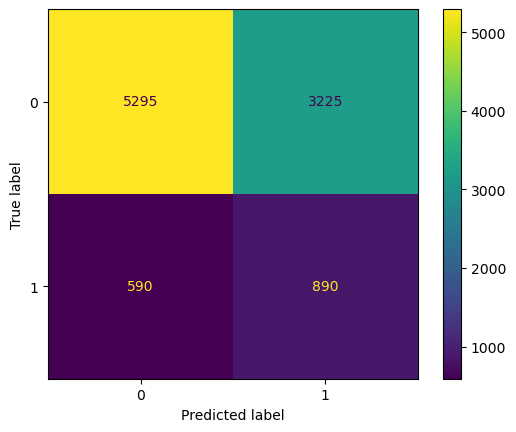

In [208]:
ConfusionMatrixDisplay.from_estimator(model_under,X_test,y_test);

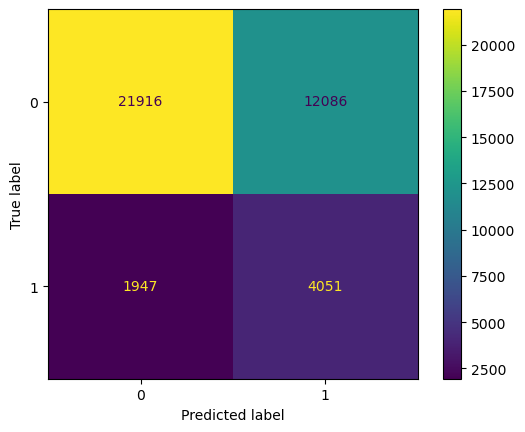

In [209]:
ConfusionMatrixDisplay.from_estimator(model_under,X_train,y_train);